In [36]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

# set display options
pd.set_option('display.max_columns', None)

In [254]:
zri = pd.read_csv('./data/df.csv', index_col=0)

In [255]:
zri.columns

Index(['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'FIPSCode',
       'Labor\nForce', 'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'geo_id', 'total_pop', 'median_age',
       'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree', 'year',
       'population_change', 'natural_amenity_rank'],
      dtype='object')

In [279]:
zri['MortDeliq30-89'] = zri['MortDeliq30-89'].fillna(zri['MortDeliq30-89'].mean())
zri['MortDeliq90'] = zri['MortDeliq90'].fillna(zri['MortDeliq90'].mean())

In [280]:
train = pd.merge(zri.loc[zri['Year']==2015].drop(columns = ['value']),
                 zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','value']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(zri.loc[zri['Year']==2016].drop(columns = ['value']),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','value']],
                how = 'left', on = ['ZIPCODE', 'Month'])

In [281]:
train['AGIncome'] = (train['AGIncome']*1000)/train['total_pop']
train['TotIncome'] = (train['TotIncome']*1000)/train['total_pop']
train['SalariesWages'] = (train['SalariesWages']*1000)/train['total_pop']
train['NumUnemply'] =(train['NumUnemply']*1000)/train['total_pop']
train['TotTaxes'] = (train['TotTaxes']*1000)/train['total_pop']
train = train.replace(np.nan, 0)

In [282]:
test['AGIncome'] = (test['AGIncome']*1000)/test['total_pop']
test['TotIncome'] = (test['TotIncome']*1000)/test['total_pop']
test['SalariesWages'] = (test['SalariesWages']*1000)/test['total_pop']
test['NumUnemply'] = (test['NumUnemply']*1000)/test['total_pop']
test['TotTaxes'] = (test['TotTaxes']*1000)/test['total_pop']

In [283]:
#drop columns to test

dropped = ['SizeRank', 'City', 'State', 'Metro', 'CountyName',\
                        'Month', 'Year','Labor\nForce','Employed', 'Unemployed',\
                        'Year-Month', 'ZIPCODE', 'FIPSCode', 'geo_id']

train.drop(columns = dropped, inplace=True)
test.drop(columns = dropped, inplace=True)

print(test.columns)
train.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'year', 'population_change', 'natural_amenity_rank',
       'value'],
      dtype='object')


Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'year', 'population_change', 'natural_amenity_rank',
       'value'],
      dtype='object')

In [284]:
train = train.apply(pd.to_numeric)

In [285]:
train.columns[test.isnull().any()]

Index(['value'], dtype='object')

In [286]:
train = train.dropna(subset=['value'])

In [287]:
X_train = train.drop(columns = ['value'])
y_train = train['value']

In [288]:
test.columns[test.isnull().any()]

Index(['value'], dtype='object')

In [289]:
test = test.dropna(subset=['value'])

In [290]:
X_test = test.drop(columns = ['value'])
y_test = test['value']

In [291]:
#show columns with missing values
print(X_train.columns[X_train.isnull().any()])
print(X_test.columns[X_test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


In [292]:
X_train.shape

(16922, 26)

In [293]:
y_train.shape

(16922,)

In [294]:
X_test.shape

(16339, 26)

In [295]:
y_test.shape

(16339,)

In [296]:
X_train.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'year', 'population_change', 'natural_amenity_rank'],
      dtype='object')

In [297]:
X_test.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'year', 'population_change', 'natural_amenity_rank'],
      dtype='object')

In [298]:
X_train.drop(columns = ['total_pop','year'], inplace=True)

X_test.drop(columns = ['total_pop','year'], inplace=True)

In [299]:
X_train.columns

Index(['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply',
       'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'median_age', 'white_pop', 'black_pop', 'asian_pop',
       'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'population_change', 'natural_amenity_rank'],
      dtype='object')

In [300]:
#feature selection
model_cols = ['Season','Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',\
              'MortDeliq90', 'median_age', 'white_pop', 'black_pop', 'asian_pop',\
              'hispanic_pop', 'gini_index', 'income_per_capita',\
              'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',\
              'high_school_diploma', 'associates_degree', 'bachelors_degree',\
              'masters_degree', 'natural_amenity_rank']

X_train = X_train[model_cols]

X_test = X_test[model_cols]

## Model Generation

In [301]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import model_selection

In [302]:
lm = LinearRegression()

lm.fit(X_train, y_train)

print("Train Score: %.4f" % lm.score(X_train, y_train))
print("Test Score:  %.4f" % lm.score(X_test, y_test))

print(lm.score(X_train, y_train)- lm.score(X_test, y_test))



Train Score: 0.6492
Test Score:  0.6683
-0.019115255024999778


In [303]:
lm.intercept_, lm.coef_

(-123.04675250793707,
 array([-4.36564413e+01, -1.27379133e+00, -2.65615861e+02,  1.16112471e+02,
        -9.01579190e+00, -5.65075417e+02,  5.25141988e+01,  1.31223682e+03,
         5.31168371e+02,  1.26988729e+03,  1.91194171e-02, -4.43441865e+03,
         1.55686129e+01,  3.71462427e+03, -2.48075662e+03,  1.16080138e+03,
         2.23033593e+03,  7.84420508e+01]))

In [304]:
from sklearn.model_selection import cross_val_score
print(np.sqrt(-1* cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[389.99356679 391.43145764 427.5782599  394.66559382 439.48684143]


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

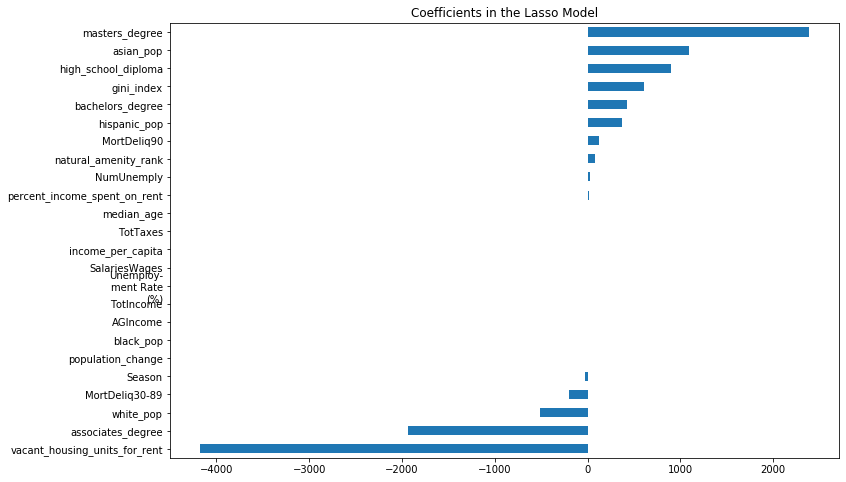

In [218]:
# param_grid={'alpha': np.logspace(-5, -3, 100)}
# grid_search = model_selection.GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv=3)
# grid_search.fit(X_train, y_train)

# print("Cross Validation")
# print("-" * 20)
# print("Best parameter: ", grid_search.best_params_)
# print("Best CV score:  %.4f" % grid_search.best_score_)

#alpha_cv = grid_search.best_estimator_.get_params()['alpha']

lasso = Lasso(alpha = .1, normalize=True).fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh", figsize = (12, 8))
plt.title("Coefficients in the Lasso Model")

In [166]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,1,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)
    lasso.fit(X_train, y_train)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(X_train, y_train))

Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

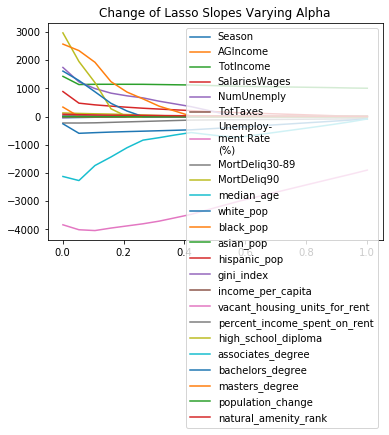

In [167]:
coefs = pd.DataFrame(np.array(coefs), columns=X_train.columns)
for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=0)
plt.title('Change of Lasso Slopes Varying Alpha')

In [168]:
lm.fit(X_train, y_train)

print('Linear Model')
print('-'*20)
print("Train Score:   %.5f" % lm.score(X_train, y_train))
print("Test Score:    %.5f\n" % lm.score(X_test, y_test))

Linear Model
--------------------
Train Score:   0.67792
Test Score:    0.69791



In [55]:
lasso.fit(X_train, y_train)

print('Penalized Linear Model')
print('-'*20)
print("Train Score: %.5f" % lasso.score(X_train, y_train))
print("Test Score:  %.5f" % lasso.score(X_test, y_test))

Penalized Linear Model
--------------------
Train Score: 0.64900
Test Score:  0.64157


In [57]:
from sklearn.metrics import mean_squared_error

def expo(list_):
    return list(map(exp, list_))

print('Final Model')
print('-'*20)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)#lin_mod

    
print("R^2 Score:  %.2f" % (100*lm.score(X_train, y_train)))
print("Mean Error: $%.0f\n" % mean_squared_error(y_test, y_pred))


Final Model
--------------------
R^2 Score:  67.72
Mean Error: $403563



In [59]:
# Instantiate, fit, predict
from sklearn.metrics import r2_score 


lin_mod.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lin_mod.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-1.52898291e+01  1.06258171e+00 -1.08879383e+00  4.31478558e-02
  4.89777943e+01  2.62858205e-01 -7.14965990e+01 -2.16507300e+02
  1.34428214e+02  1.67733102e+00 -2.96815164e+02  2.21197792e+02
  1.26933357e+03  9.37095453e+02  1.60684247e+03  1.54432520e-02
 -2.23443558e+03  2.31680474e+01  2.29210718e+03 -1.45505699e+03
  1.32779261e+03  2.11029125e+03  3.81395898e-01  5.51955040e+01]
Mean squared error: 403562.96
R_squared score: 0.06


In [208]:
res_x = [target/1000 for target in expo(y_test)]
res_y = [(target - predict)/1000 for (target, predict) in zip(expo(y_test), expo(lm.predict(y_pred)))]
plt.figure(figsize=(8,8))
plt.scatter(res_x, res_y, alpha = 0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Actual House Price in $K')
plt.ylabel('Residual House Price in $K')

OverflowError: math range error

In [ ]:
#feature engineering

#Median_age of each zipcode



In [22]:
X_train.columns

Index(['SizeRank', 'Season', 'AGIncome', 'TotIncome', 'SalariesWages',
       'NumUnemply', 'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'RentalVacancyRate', 'white', 'black', 'asian', 'NHOPI',
       'hispanic_latino', '20_to_24', '25_to_34', '35_to_44', '45_to_54',
       '55_to_59', '60_to_64', '65_to_74', '75_to_85', '85_over',
       'Population'],
      dtype='object')

In [ ]:
#drop 'SizeRank',

#1 # keep ordinal'Season'

# drop 'AGIncome', 'TotIncome', 'SalariesWages', Unemploy-\nment Rate\n(%)', 

#2 #Keep'TotTaxes', 

#3 #''NumUnemply', 

#4 #'MortDeliq30-89',

#5 #'MortDeliq90', 

#6 #'RentalVacancyRate', 

#7-9 'white', 'black', 'asian', 'NHOPI',
       
# drop for now'hispanic_latino', 

#10 # Feature engineer to be median age '20_to_24', '25_to_34', '35_to_44', '45_to_54','55_to_59', '60_to_64', '65_to_74', '75_to_85', '85_over',

# drop'Population'

In [131]:
train_set = pd.concat([X_train, y_train], axis=1)

In [132]:
train_set.head()

,Season,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,natural_amenity_rank,value
0,2,4.9,1.000000,1.100000,40.3,0.557688,0.098274,0.091893,0.222228,0.5701,58664.0,0.033756,29.0,0.057709,0.021641,0.217179,0.178665,3.0,3727.0
1,2,6.2,2.300000,3.000000,30.9,0.815625,0.026682,0.071471,0.060639,0.5041,65121.0,0.053914,26.4,0.032742,0.027232,0.356183,0.168265,3.0,1735.0
2,2,4.9,1.000000,1.100000,42.1,0.757419,0.026590,0.093454,0.097052,0.5611,103249.0,0.068275,25.5,0.046149,0.014921,0.267554,0.243026,3.0,3609.0
3,2,4.3,2.127322,2.155775,34.4,0.581662,0.062797,0.155716,0.173303,0.3454,47454.0,0.030479,23.5,0.046845,0.046028,0.242833,0.099231,3.0,1214.0
4,2,6.2,2.300000,3.000000,30.1,0.804186,0.043573,0.057157,0.066750,0.5235,70514.0,0.028165,24.5,0.033692,0.014865,0.334558,0.156634,3.0,1836.0


In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and asian_pop")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'value ~ asian_pop', data=train_set).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between ZRI value and asian_pop
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4179.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:09:14   Log-Likelihood:            -1.3272e+05
No. Observations:               16922   AIC:                         2.654e+05
Df Residuals:                   16920   BIC:                         2.655e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [148]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and income_per_capita")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'value ~ income_per_capita', data=train_set).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between ZRI value and income_per_capita
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                 1.891e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:44:04   Log-Likelihood:            -4.1701e+05
No. Observations:               54620   AIC:                         8.340e+05
Df Residuals:                   54618   BIC:                         8.340e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

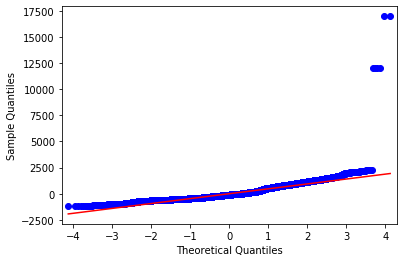

In [149]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

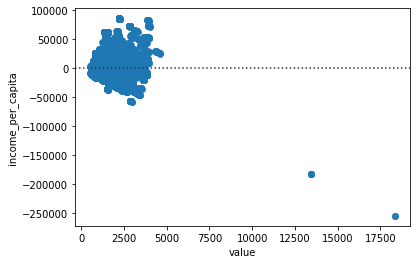

In [151]:
# simple plot of residuals
import seaborn as sns

sns.residplot('value', 'income_per_capita', data=train_set)

In [159]:
train_set.columns

Index(['income_per_capita', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'value'],
      dtype='object')

In [176]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train_set.shape, "\n")
print ("Column Headers:", list(train_set.columns.values), "\n")
print (train_set.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (54620, 15) 

Column Headers: ['income_per_capita', 'median_age', 'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90', 'percent_income_spent_on_rent', 'high_school_diploma', 'associates_degree', 'bachelors_degree', 'masters_degree', 'value'] 

income_per_capita               float64
median_age                      float64
white_pop                       float64
black_pop                       float64
asian_pop                       float64
hispanic_pop                    float64
Unemploy-\nment Rate\n(%)       float64
MortDeliq30-89                  float64
MortDeliq90                     float64
percent_income_spent_on_rent    float64
high_school_diploma             float64
associates_degree               float64
bachelors_degree                float64
masters_degree                  float64
value                           float64
d

In [177]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train_set:
    # Find all the unique feature values
    uniq = train_set[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train_set[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'income_per_capita' has 1608 unique values
~~Listing up to 10 unique values~~
[ 68995.  69983. 114641.  48249.  73991.  30677.  26893.  22610.  39257.
  24798.]

-----------------------------------------------------------------------

'median_age' has 1640 unique values
~~Listing up to 10 unique values~~
[0.00044182 0.00044506 0.00069253 0.00032875 0.00043005 0.00053641
 0.00031554 0.00027878 0.00054792 0.00033241]

-----------------------------------------------------------------------

'white_pop' has 1640 unique values
~~Listing up to 10 unique values~~
[0.54056918 0.81037901 0.72030757 0.51182761 0.79384834 0.20799487
 0.29420933 0.09150449 0.55763427 0.11041575]

-----------------------------------------------------------------------

'black_pop' has 1639 unique values
~~Listing up to 10 unique values~~
[0.09032443 0.02827268 0.03348831 0.07157028 0.04209327 0.06111004
 0.15225373 0.02380314 0.17136453 0.65292197]

----------------------------------------

In [178]:
# Check for duplicate index or rows
idsUnique = len(set(train_set.index))
idsTotal = train_set.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 54620 total entries


In [179]:
#get summary of numerical variables
train_set.describe()

,income_per_capita,median_age,white_pop,black_pop,asian_pop,hispanic_pop,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,value
count,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000
mean,35310.429696,0.001272,0.549537,0.149582,0.073754,0.190990,4.401668,0.584074,0.378962,30.853182,0.129229,0.049854,0.160802,0.075925,1451.298792
std,16932.269793,0.001101,0.241982,0.184604,0.087030,0.182757,1.410166,0.966769,0.655935,4.856297,0.053856,0.018496,0.079110,0.048576,580.814489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541.000000
25%,23420.500000,0.000735,0.382418,0.027370,0.020537,0.061989,3.600000,0.000000,0.000000,27.500000,0.087329,0.036387,0.098236,0.039104,1035.750000
50%,31472.000000,0.001043,0.589044,0.079101,0.042825,0.128981,4.200000,0.000000,0.000000,30.300000,0.131911,0.048876,0.154487,0.066141,1335.000000
75%,43521.500000,0.001505,0.745745,0.189452,0.096552,0.245951,5.000000,1.200000,0.700000,33.500000,0.169399,0.061854,0.213617,0.107515,1724.000000
max,154723.000000,0.015890,0.973506,0.982393,0.726602,0.977026,14.600000,6.400000,3.600000,50.000000,0.279457,0.126473,0.462318,0.344235,18349.000000


In [180]:
# Skewness of the distribution

print(train_set.skew())

# Values close to 0 show less skew


income_per_capita               1.612365
median_age                      7.017474
white_pop                      -0.499358
black_pop                       2.174977
asian_pop                       2.658967
hispanic_pop                    1.646705
Unemploy-\nment Rate\n(%)       1.013576
MortDeliq30-89                  1.607193
MortDeliq90                     1.717386
percent_income_spent_on_rent    0.588533
high_school_diploma             0.047329
associates_degree               0.442241
bachelors_degree                0.520415
masters_degree                  0.875553
value                           2.476307
dtype: float64


In [181]:
# Skewness of the distribution

print(train_set.kurt())

income_per_capita                4.086358
median_age                      73.662056
white_pop                       -0.711771
black_pop                        5.017894
asian_pop                        8.898027
hispanic_pop                     2.494149
Unemploy-\nment Rate\n(%)        5.123888
MortDeliq30-89                   2.146365
MortDeliq90                      2.085096
percent_income_spent_on_rent     2.098374
high_school_diploma             -0.765055
associates_degree                0.230890
bachelors_degree                -0.133190
masters_degree                   0.454484
value                           40.194009
dtype: float64


In [183]:
#Check when a value in a cloumn is zero
train_set[(train_set['value'] == 0)].count()

income_per_capita               0
median_age                      0
white_pop                       0
black_pop                       0
asian_pop                       0
hispanic_pop                    0
Unemploy-\nment Rate\n(%)       0
MortDeliq30-89                  0
MortDeliq90                     0
percent_income_spent_on_rent    0
high_school_diploma             0
associates_degree               0
bachelors_degree                0
masters_degree                  0
value                           0
dtype: int64

In [184]:
df = train_set[['income_per_capita','value']]


In [185]:
df.head()


,income_per_capita,value
0,68995.0,3727.0
1,69983.0,1735.0
2,69983.0,1735.0
3,69983.0,1735.0
4,114641.0,3609.0


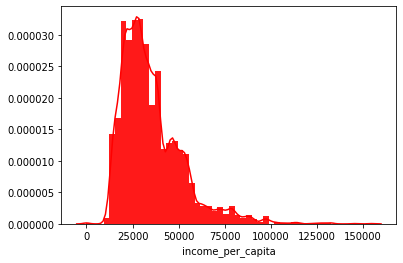

In [187]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df['income_per_capita'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

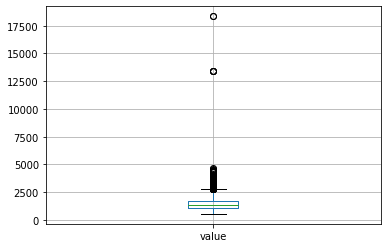

In [189]:
train_set.boxplot(column="value")
#sns.boxplot(x='value', y='Year', data=train_set)

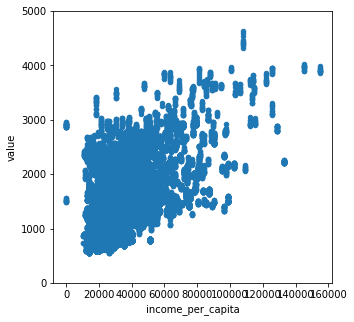

In [193]:
train_set.plot(kind="scatter",     # Create a scatterplot
              x="income_per_capita",          # Put carat on the x axis
              y=np."value",          # Put price on the y axis
              figsize=(5,5),
              ylim=(0,5000))

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [127]:
gbm = GradientBoostingRegressor()

gbm.set_params(n_estimators = 1000, 
            learning_rate = .1, #.3,
            max_depth = 3, #2,
            min_samples_leaf = 3)

gbm.fit(X_train,y_train)

print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,y_test)))

--------------------------------------------------
The train set R^2 is 0.940
The test set R^2 is 0.802


In [128]:
#Random Forrest
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

randomForest.set_params(random_state=42, max_depth = 3, min_samples_split = 2, n_estimators=1000, max_features =4)

print(randomForest.fit(X_train,y_train))


print(randomForest.score(X_train,y_train))
randomForest.score(X_test,y_test)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
0.5325404983815691


0.534606952011383

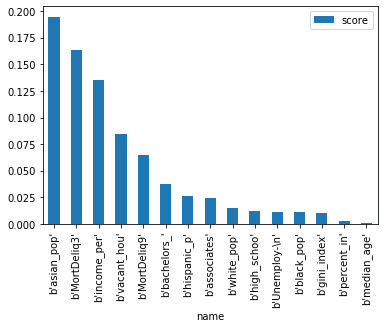

In [129]:
feature_importance = list(zip(X_train.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')